In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df_test.head(7)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC
5,4658152,dsgdb9nsd_000015,3,0,1JHC
6,4658153,dsgdb9nsd_000015,3,2,3JHC


In [6]:
structures = pd.read_csv('structures.csv')

In [7]:
structures.head(7)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377


In [12]:
df = pd.merge(df_train,structures.rename(columns={'atom_index':'atom_index_0','atom':'atom_0','x':'x0','y':'y0','z':'z0'}),
              on=['molecule_name','atom_index_0'],how='left')

In [13]:
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x0,y0,z0
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277


In [21]:
df1 = pd.merge(df,structures.rename(columns={'atom_index':'atom_index_1','atom':'atom_1','x':'x1','y':'y1','z':'z1'}),
              on=['molecule_name','atom_index_1'],how='left')

In [22]:
df1.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x0,y0,z0,atom_1,x1,y1,z1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [ ]:
df_final = df1.drop(['atom_index_0','atom_index_1'],inplace=True,axis=1)

In [19]:
df_final.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
df_train['atom_0'] = df_train['atom_index_0'].map()

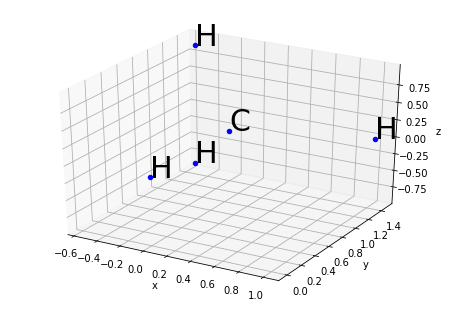

In [8]:
from matplotlib import pyplot
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from pylab import figure

m=np.asarray(structures[0:5][['x','y','z']])

fig = figure()
ax = Axes3D(fig)


for i in range(len(m)): #plot each point + it's index as text above
    ax.scatter(m[i,0],m[i,1],m[i,2],color='b') 
    ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(structures['atom'][i])), size=30, zorder=1,  
    color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()